In [1]:

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,roc_auc_score
#from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
data = pd.read_csv('H-1B_Disclosure_Data_FY17.csv.zip')
data.head()

C:\Users\bhara\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15,16,17,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,0,I-200-16055-173457,CERTIFIED-WITHDRAWN,2016-02-24,2016-10-01,H-1B,2016-08-10,2019-08-10,DISCOVER PRODUCTS INC.,NaN,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-01
1,1,I-200-16064-557834,CERTIFIED-WITHDRAWN,2016-03-04,2016-10-01,H-1B,2016-08-16,2019-08-16,DFS SERVICES LLC,NaN,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-08
2,2,I-200-16063-996093,CERTIFIED-WITHDRAWN,2016-03-10,2016-10-01,H-1B,2016-09-09,2019-09-09,EASTBANC TECHNOLOGIES LLC,NaN,...,Y,N,Y,NaN,NaN,WASHINGTON,NaN,DC,20007,2016-03-16
3,3,I-200-16272-196340,WITHDRAWN,2016-09-28,2016-10-01,H-1B,2017-01-26,2020-01-25,INFO SERVICES LLC,NaN,...,Y,N,Y,NaN,NaN,JERSEY CITY,HUDSON,NJ,07302,NaN
4,4,I-200-15053-636744,CERTIFIED-WITHDRAWN,2015-02-22,2016-10-02,H-1B,2015-03-01,2018-03-01,BB&T CORPORATION,NaN,...,N,N,NaN,Y,NaN,NEW YORK,NEW YORK,NY,10036,2015-02-26


In [3]:
data.drop(['CASE_NUMBER','Unnamed: 0'],axis = 1,inplace= True)# as both columns are not making sense

In [4]:
data.drop(['PUBLIC_DISCLOSURE_LOCATION','EMPLOYER_BUSINESS_DBA','ORIGINAL_CERT_DATE','EMPLOYER_PHONE_EXT','EMPLOYER_PROVINCE'],axis = 1,inplace = True)
# as these columns having more than 90% missing values

In [5]:
import datetime as dt

In [6]:
data["Experience"] = -1*(pd.to_datetime(data["EMPLOYMENT_START_DATE"]) - pd.to_datetime(data["EMPLOYMENT_END_DATE"])).values

In [7]:
data["desicion_period"] = (pd.to_datetime(data["DECISION_DATE"]) - pd.to_datetime(data["CASE_SUBMITTED"])).values

In [8]:
data["Experience"]  = data['Experience'].astype(dt.timedelta).map(lambda x:np.nan if pd.isnull(x) else x.days)

In [9]:
data['desicion_period'] = data['desicion_period'].astype(dt.timedelta).map(lambda x:np.nan if pd.isnull(x) else x.days)

In [10]:
data.drop(['EMPLOYMENT_START_DATE','EMPLOYMENT_END_DATE','DECISION_DATE','CASE_SUBMITTED'],axis = 1,inplace = True)

In [11]:
data.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,EMPLOYER_PHONE,AGENT_REPRESENTING_EMPLOYER,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,Experience,desicion_period
0,CERTIFIED-WITHDRAWN,H-1B,DISCOVER PRODUCTS INC.,2500 LAKE COOK ROAD,RIVERWOODS,IL,60015,UNITED STATES OF AMERICA,2244050900,Y,...,N,N,NaN,Y,RIVERWOODS,LAKE,IL,60015,1095.0,220
1,CERTIFIED-WITHDRAWN,H-1B,DFS SERVICES LLC,2500 LAKE COOK ROAD,RIVERWOODS,IL,60015,UNITED STATES OF AMERICA,2244050900,Y,...,N,N,NaN,Y,RIVERWOODS,LAKE,IL,60015,1095.0,211
2,CERTIFIED-WITHDRAWN,H-1B,EASTBANC TECHNOLOGIES LLC,1211 31ST ST. NW,WASHINGTON,DC,20007,UNITED STATES OF AMERICA,2022953000,Y,...,Y,N,Y,NaN,WASHINGTON,NaN,DC,20007,1095.0,205
3,WITHDRAWN,H-1B,INFO SERVICES LLC,17177 NORTH LAUREL PARK DR,LIVONIA,MI,48152,UNITED STATES OF AMERICA,7343776007,N,...,Y,N,Y,NaN,JERSEY CITY,HUDSON,NJ,07302,1094.0,3
4,CERTIFIED-WITHDRAWN,H-1B,BB&T CORPORATION,223 WEST NASH STREET,WILSON,NC,27893,UNITED STATES OF AMERICA,2522462031,Y,...,N,N,NaN,Y,NEW YORK,NEW YORK,NY,10036,1096.0,588


In [12]:
data['FULL_TIME_POSITION'].fillna(data['FULL_TIME_POSITION'].mode()[0],inplace = True)
data['NAICS_CODE'].fillna(data['NAICS_CODE'].mode()[0],inplace = True)
data['SOC_NAME'].fillna(data['SOC_NAME'].mode()[0],inplace = True)
data['JOB_TITLE'].fillna(data['JOB_TITLE'].mode()[0],inplace = True)
data['AGENT_REPRESENTING_EMPLOYER'].fillna(data['AGENT_REPRESENTING_EMPLOYER'].mode()[0],inplace = True)
data['EMPLOYER_COUNTRY'].fillna(data['EMPLOYER_COUNTRY'].mode()[0],inplace = True)
data['EMPLOYER_NAME'].fillna(data['EMPLOYER_NAME'].mode()[0],inplace = True)
data['AGENT_ATTORNEY_CITY'].fillna(data['AGENT_ATTORNEY_CITY'].mode()[0],inplace = True)


In [13]:
data['WORKSITE_STATE'].fillna(data['EMPLOYER_STATE'].mode()[0],inplace = True)
data['Experience'].fillna(data['Experience'].mode()[0],inplace = True)
data['LABOR_CON_AGREE'].fillna(data['LABOR_CON_AGREE'].mode()[0],inplace = True)
data['SUPPORT_H1B'].fillna(data['SUPPORT_H1B'].mode()[0],inplace = True)
data['WILLFUL_VIOLATOR'].fillna(data['WILLFUL_VIOLATOR'].mode()[0],inplace = True)
data['H1B_DEPENDENT'].fillna(data['H1B_DEPENDENT'].mode()[0],inplace = True)
data['WAGE_UNIT_OF_PAY'].fillna(data['WAGE_UNIT_OF_PAY'].mode()[0],inplace = True)
data['WAGE_RATE_OF_PAY_TO'].fillna(data['WAGE_RATE_OF_PAY_TO'].mode()[0],inplace = True)
data['PW_SOURCE_YEAR'].fillna(data['PW_SOURCE_YEAR'].mode()[0],inplace = True)
data['PW_SOURCE'].fillna(data['PW_SOURCE'].mode()[0],inplace = True)
data['PREVAILING_WAGE'].fillna(data['PREVAILING_WAGE'].mode()[0],inplace = True)
data['PW_SOURCE'].fillna(data['PW_SOURCE'].mode()[0],inplace = True)



In [14]:
data.drop(['EMPLOYER_ADDRESS','EMPLOYER_CITY','EMPLOYER_POSTAL_CODE','EMPLOYER_PHONE'],axis = 1, inplace= True)


In [15]:
data.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,JOB_TITLE,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,Experience,desicion_period
0,CERTIFIED-WITHDRAWN,H-1B,DISCOVER PRODUCTS INC.,IL,UNITED STATES OF AMERICA,Y,"ELLSWORTH, CHAD",NEW YORK,NY,ASSOCIATE DATA INTEGRATION,...,N,N,Y,Y,RIVERWOODS,LAKE,IL,60015,1095.0,220
1,CERTIFIED-WITHDRAWN,H-1B,DFS SERVICES LLC,IL,UNITED STATES OF AMERICA,Y,"ELLSWORTH, CHAD",NEW YORK,NY,SENIOR ASSOCIATE,...,N,N,Y,Y,RIVERWOODS,LAKE,IL,60015,1095.0,211
2,CERTIFIED-WITHDRAWN,H-1B,EASTBANC TECHNOLOGIES LLC,DC,UNITED STATES OF AMERICA,Y,"BURKE, KAREN",WASHINGTON,DC,.NET SOFTWARE PROGRAMMER,...,Y,N,Y,Y,WASHINGTON,NaN,DC,20007,1095.0,205
3,WITHDRAWN,H-1B,INFO SERVICES LLC,MI,UNITED STATES OF AMERICA,N,",",NEW YORK,NaN,PROJECT MANAGER,...,Y,N,Y,Y,JERSEY CITY,HUDSON,NJ,07302,1094.0,3
4,CERTIFIED-WITHDRAWN,H-1B,BB&T CORPORATION,NC,UNITED STATES OF AMERICA,Y,"SCOFIELD, EILEEN",ATLANTA,GA,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,...,N,N,Y,Y,NEW YORK,NEW YORK,NY,10036,1096.0,588


In [16]:
data['VISA_CLASS'].unique()

array(['H-1B', 'E-3 Australian', 'H-1B1 Singapore', 'H-1B1 Chile'],
      dtype=object)

In [17]:
data = data.drop(data[data.CASE_STATUS == 'WITHDRAWN'].index)
# as withdraw cases are very less

In [18]:
import warnings
warnings.filterwarnings("ignore")
data.CASE_STATUS[data['CASE_STATUS']=='CERTIFIED-WITHDRAWN'] = 'CERTIFIED'

In [19]:
data.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,JOB_TITLE,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,Experience,desicion_period
0,CERTIFIED,H-1B,DISCOVER PRODUCTS INC.,IL,UNITED STATES OF AMERICA,Y,"ELLSWORTH, CHAD",NEW YORK,NY,ASSOCIATE DATA INTEGRATION,...,N,N,Y,Y,RIVERWOODS,LAKE,IL,60015,1095.0,220
1,CERTIFIED,H-1B,DFS SERVICES LLC,IL,UNITED STATES OF AMERICA,Y,"ELLSWORTH, CHAD",NEW YORK,NY,SENIOR ASSOCIATE,...,N,N,Y,Y,RIVERWOODS,LAKE,IL,60015,1095.0,211
2,CERTIFIED,H-1B,EASTBANC TECHNOLOGIES LLC,DC,UNITED STATES OF AMERICA,Y,"BURKE, KAREN",WASHINGTON,DC,.NET SOFTWARE PROGRAMMER,...,Y,N,Y,Y,WASHINGTON,NaN,DC,20007,1095.0,205
4,CERTIFIED,H-1B,BB&T CORPORATION,NC,UNITED STATES OF AMERICA,Y,"SCOFIELD, EILEEN",ATLANTA,GA,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,...,N,N,Y,Y,NEW YORK,NEW YORK,NY,10036,1096.0,588
5,CERTIFIED,H-1B,"SUNTRUST BANKS, INC.",GA,UNITED STATES OF AMERICA,Y,"SCOFIELD, EILEEN",ATLANTA,GA,CREDIT RISK METRICS SPECIALIST,...,N,N,Y,Y,ATLANTA,FULTON,GA,30303,1096.0,570


In [20]:
data.drop(['WORKSITE_CITY','WORKSITE_COUNTY','WORKSITE_POSTAL_CODE'],axis = 1, inplace = True)

In [21]:
data.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,JOB_TITLE,...,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_STATE,Experience,desicion_period
0,CERTIFIED,H-1B,DISCOVER PRODUCTS INC.,IL,UNITED STATES OF AMERICA,Y,"ELLSWORTH, CHAD",NEW YORK,NY,ASSOCIATE DATA INTEGRATION,...,65811.0,67320.0,Year,N,N,Y,Y,IL,1095.0,220
1,CERTIFIED,H-1B,DFS SERVICES LLC,IL,UNITED STATES OF AMERICA,Y,"ELLSWORTH, CHAD",NEW YORK,NY,SENIOR ASSOCIATE,...,53000.0,57200.0,Year,N,N,Y,Y,IL,1095.0,211
2,CERTIFIED,H-1B,EASTBANC TECHNOLOGIES LLC,DC,UNITED STATES OF AMERICA,Y,"BURKE, KAREN",WASHINGTON,DC,.NET SOFTWARE PROGRAMMER,...,77000.0,0.0,Year,Y,N,Y,Y,DC,1095.0,205
4,CERTIFIED,H-1B,BB&T CORPORATION,NC,UNITED STATES OF AMERICA,Y,"SCOFIELD, EILEEN",ATLANTA,GA,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,...,132500.0,0.0,Year,N,N,Y,Y,NY,1096.0,588
5,CERTIFIED,H-1B,"SUNTRUST BANKS, INC.",GA,UNITED STATES OF AMERICA,Y,"SCOFIELD, EILEEN",ATLANTA,GA,CREDIT RISK METRICS SPECIALIST,...,71750.0,0.0,Year,N,N,Y,Y,GA,1096.0,570


In [22]:
from sklearn.preprocessing import LabelEncoder


In [23]:
le = LabelEncoder()
data['CASE_STATUS'] = le.fit_transform(data['CASE_STATUS'])

In [24]:
data['PW_SOURCE_OTHER'].fillna(data['PW_SOURCE_OTHER'].mode()[0],inplace = True)
data['PW_WAGE_LEVEL'].fillna(data['PW_WAGE_LEVEL'].mode()[0],inplace = True)#data['PW_UNIT_OF_PAY'].fillna(data['PW_UNIT_OF_PAY'].mode()[0],inplace = True)
data['AGENT_ATTORNEY_STATE'].fillna(data['PW_UNIT_OF_PAY'].mode()[0],inplace = True)
data['EMPLOYER_STATE'].fillna(data['EMPLOYER_STATE'].mode()[0],inplace = True)
   
data['PW_UNIT_OF_PAY'].fillna(data['PW_UNIT_OF_PAY'].mode()[0],inplace = True)


In [25]:
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [26]:
dummyEncode(data)

Error encoding NAICS_CODE


,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,JOB_TITLE,...,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_STATE,Experience,desicion_period
0,0,1,17985,17,4,1,1567,653,36,6723,...,65811.00,67320.00,4,0,0,1,1,16,1095.0,220
1,0,1,17630,17,4,1,1567,653,36,61806,...,53000.00,57200.00,4,0,0,1,1,16,1095.0,211
2,0,1,19270,8,4,1,695,999,7,88,...,77000.00,0.00,4,1,0,1,1,7,1095.0,205
4,0,1,7555,31,4,1,5199,37,10,6389,...,132500.00,0.00,4,0,0,1,1,37,1096.0,588
5,0,1,59347,12,4,1,5199,37,10,17270,...,71750.00,0.00,4,0,0,1,1,11,1096.0,570
6,0,1,12937,35,4,0,0,653,55,12193,...,61000.00,0.00,4,1,0,1,1,34,1094.0,220
7,0,1,12937,35,4,0,0,653,55,52650,...,60500.00,0.00,4,1,0,1,1,34,1094.0,220
8,0,1,12937,35,4,0,0,653,55,52650,...,60450.00,0.00,4,1,0,1,1,37,1094.0,218
9,0,1,12937,35,4,0,0,653,55,41627,...,50000.00,0.00,4,1,0,1,1,34,1092.0,217
10,0,1,12937,35,4,0,0,653,55,52650,...,60400.00,0.00,4,1,0,1,1,37,1095.0,216


In [27]:
data.drop(['NAICS_CODE'],axis = 1,inplace = True)#as its having no impact on CASE_STATUS

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603878 entries, 0 to 624649
Data columns (total 36 columns):
CASE_STATUS                    603878 non-null int32
VISA_CLASS                     603878 non-null int32
EMPLOYER_NAME                  603878 non-null int32
EMPLOYER_STATE                 603878 non-null int32
EMPLOYER_COUNTRY               603878 non-null int32
AGENT_REPRESENTING_EMPLOYER    603878 non-null int32
AGENT_ATTORNEY_NAME            603878 non-null int32
AGENT_ATTORNEY_CITY            603878 non-null int32
AGENT_ATTORNEY_STATE           603878 non-null int32
JOB_TITLE                      603878 non-null int32
SOC_CODE                       603878 non-null int32
SOC_NAME                       603878 non-null int32
TOTAL_WORKERS                  603878 non-null int64
NEW_EMPLOYMENT                 603878 non-null int64
CONTINUED_EMPLOYMENT           603878 non-null int64
CHANGE_PREVIOUS_EMPLOYMENT     603878 non-null int64
NEW_CONCURRENT_EMPLOYMENT      603878 non

In [29]:
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [30]:
dummyEncode(data)

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,JOB_TITLE,...,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_STATE,Experience,desicion_period
0,0,1,17985,17,4,1,1567,653,36,6723,...,65811.00,67320.00,4,0,0,1,1,16,1095.0,220
1,0,1,17630,17,4,1,1567,653,36,61806,...,53000.00,57200.00,4,0,0,1,1,16,1095.0,211
2,0,1,19270,8,4,1,695,999,7,88,...,77000.00,0.00,4,1,0,1,1,7,1095.0,205
4,0,1,7555,31,4,1,5199,37,10,6389,...,132500.00,0.00,4,0,0,1,1,37,1096.0,588
5,0,1,59347,12,4,1,5199,37,10,17270,...,71750.00,0.00,4,0,0,1,1,11,1096.0,570
6,0,1,12937,35,4,0,0,653,55,12193,...,61000.00,0.00,4,1,0,1,1,34,1094.0,220
7,0,1,12937,35,4,0,0,653,55,52650,...,60500.00,0.00,4,1,0,1,1,34,1094.0,220
8,0,1,12937,35,4,0,0,653,55,52650,...,60450.00,0.00,4,1,0,1,1,37,1094.0,218
9,0,1,12937,35,4,0,0,653,55,41627,...,50000.00,0.00,4,1,0,1,1,34,1092.0,217
10,0,1,12937,35,4,0,0,653,55,52650,...,60400.00,0.00,4,1,0,1,1,37,1095.0,216


In [31]:
data.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,JOB_TITLE,...,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_STATE,Experience,desicion_period
0,0,1,17985,17,4,1,1567,653,36,6723,...,65811.0,67320.0,4,0,0,1,1,16,1095.0,220
1,0,1,17630,17,4,1,1567,653,36,61806,...,53000.0,57200.0,4,0,0,1,1,16,1095.0,211
2,0,1,19270,8,4,1,695,999,7,88,...,77000.0,0.0,4,1,0,1,1,7,1095.0,205
4,0,1,7555,31,4,1,5199,37,10,6389,...,132500.0,0.0,4,0,0,1,1,37,1096.0,588
5,0,1,59347,12,4,1,5199,37,10,17270,...,71750.0,0.0,4,0,0,1,1,11,1096.0,570


In [32]:
X = data.drop(['CASE_STATUS'],axis = 1)
y = data.CASE_STATUS


In [33]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.3)

[0.01362184 0.04610946 0.0411055  0.         0.01507315 0.03259797
 0.02666553 0.02849092 0.04767622 0.0481281  0.03850978 0.01457206
 0.02107488 0.01785615 0.00928228 0.00191653 0.01567706 0.01782564
 0.00349445 0.04680263 0.02046848 0.02431254 0.02541112 0.02481493
 0.0257201  0.05133954 0.02518439 0.01051749 0.05118433 0.0003567
 0.0036035  0.00281533 0.04022591 0.04175981 0.1658057 ]


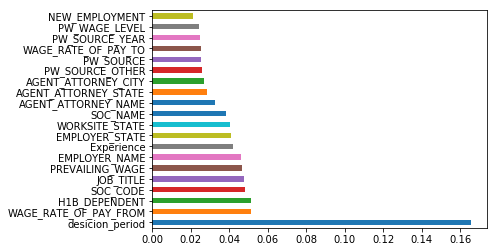

In [83]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model_extra_trees = ExtraTreesClassifier()
model_extra_trees.fit(X_train, y_train)
print(model_extra_trees.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_extra_trees.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [34]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred =lr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy


0.985891236669537

In [85]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier


In [86]:
MLA = [LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier()]
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'F1-score', 'AUC score']
MLA_compare = pd.DataFrame(columns = MLA_columns)
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
   #score model with cross validation: 
    alg.fit(X_train,y_train)
    y_pred = alg.predict(X_test)
    MLA_compare.loc[row_index, 'F1-score'] = f1_score(y_test,y_pred)
    MLA_compare.loc[row_index, 'AUC score'] = roc_auc_score(y_test,y_pred)  
    row_index+=1
MLA_compare    

,MLA Name,F1-score,AUC score
0,LogisticRegression,0.767362,0.774827
1,RandomForestClassifier,0.839698,0.846515
2,AdaBoostClassifier,0.844915,0.851202
3,GradientBoostingClassifier,0.854934,0.860614
4,XGBClassifier,0.853684,0.860744


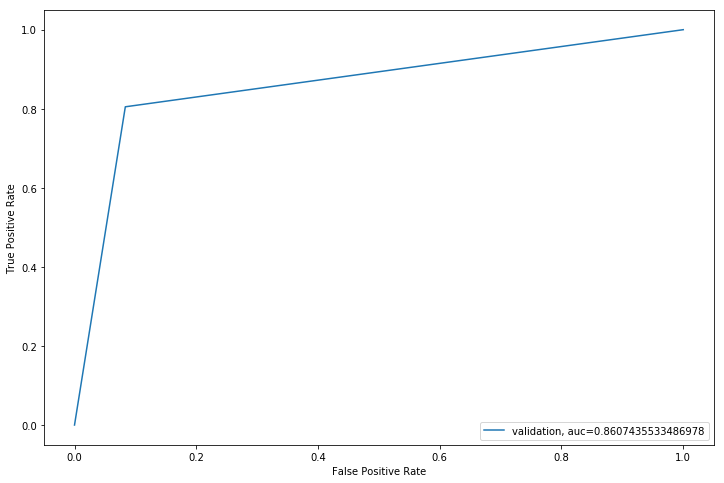

In [89]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [35]:
f1_sc = f1_score(y_test,y_pred)
f1_sc

0.006993006993006993

In [94]:
 import itertools

In [36]:
cnm = confusion_matrix(y_test,y_pred)
cnm

array([[178599,      1],
       [  2555,      9]], dtype=int64)

In [37]:
# As data is biased so need to do resampling
from sklearn.utils import resample

In [38]:
data_majority = data[data.CASE_STATUS==1]
data_minority = data[data.CASE_STATUS==0]

In [39]:

# Upsample minority class
data_minority_downsampled = resample(data_minority, 
                                 replace=False,     # sample with replacement
                                 n_samples=8480,    # to match majority class
                                 random_state=123) # reproducible results

In [40]:
#Combine majority class with upsampled minority class
data_downsampled = pd.concat([data_majority,data_minority_downsampled])
 

In [41]:
data_downsampled.CASE_STATUS.value_counts()


1    8480
0    8480
Name: CASE_STATUS, dtype: int64

In [42]:
y = data_downsampled.CASE_STATUS
X = data_downsampled.drop('CASE_STATUS', axis=1)

In [43]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.3)

In [44]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred =lr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy


0.7741745283018868

In [45]:
f1sc = f1_score(y_test,y_pred)
f1sc

0.7673618141324156

In [46]:
roc_auc_score(y_test, y_pred)

0.7748265314196975

In [47]:
cnm = confusion_matrix(y_test,y_pred)
cnm

array([[2044,  460],
       [ 689, 1895]], dtype=int64)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [49]:
dt1 = tree.DecisionTreeClassifier(criterion='entropy')

In [50]:
dt1.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Code starts here
rf_clf=RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)

rf_clf.fit(X_train,y_train)
score_rf = rf_clf.score(X_test,y_test)
print(score_rf)
# Code ends here

0.8229166666666666


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#Parameter grid
parameter_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Code starts here
#clf = RandomForestClassifer(random_state=0)
clf=RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=clf,param_grid=parameter_grid )
grid_search.fit(X_train,y_train)
score_gs = grid_search.score(X_test,y_test)
print(score_gs)

0.8551493710691824


In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Code starts here
clf = RandomForestClassifier(random_state=0)
random_search = RandomizedSearchCV(estimator=clf,param_distributions =parameter_grid,n_iter=30 , random_state=0 )
random_search.fit(X_train,y_train)
score_rs = random_search.score(X_test,y_test)
print(score_rs)

0.8545597484276729


In [54]:
dt_clf=DecisionTreeClassifier(max_depth=1,random_state=0)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [55]:
ada_clf = AdaBoostClassifier(base_estimator=dt_clf,random_state=0)
ada_clf.fit(X_train, y_train)
ada_score=ada_clf.score(X_test,y_test)
print("\nScore of AdaBoost:",ada_score)



Score of AdaBoost: 0.8504323899371069


In [56]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(base_estimator=dt_clf, random_state=0)
xgb_clf.fit(X_train,y_train)
xgb_score = xgb_clf.score(X_test,y_test)
print(xgb_score)

0.8598663522012578


In [ ]:
data.describe() #no outliers found

In [ ]:
def _print_chisquare_result(self, colX, alpha):
    result = ""
    if self.p<alpha:
        result="{0} is IMPORTANT for Prediction".format(colX)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

    print(result)

In [72]:
def TestIndependence(self,colX,colY, alpha=0.05):
    X = self.df[colX].astype(str)
    Y = self.df[colY].astype(str)

    self.dfObserved = pd.crosstab(Y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
    self.p = p
    self.chi2 = chi2
    self.dof = dof 

    self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)

    self._print_chisquare_result(colX, alpha)

In [74]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfTabular = None
        self.dfExpected = None

    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction P-value is {1}".format(colX,self.p)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)
        print(result)

    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX, alpha)

In [76]:
#Initialize ChiSquare Class
cT = ChiSquare(data)

In [80]:
data_category = data.select_dtypes(include=['object_'])
data_category.head()

""
0
1
2
3
4


In [81]:
data.head()

,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_STATE,JOB_TITLE,SOC_CODE,TOTAL_WORKERS,...,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,Experience,desicion_period
0,1.0,17985.0,17.0,4.0,1.0,1567.0,36.0,6723.0,129.0,1.0,...,2015.0,1412.0,65811.0,67320.0,0.0,0.0,1.0,1.0,1095.0,220.0
1,1.0,17630.0,17.0,4.0,1.0,1567.0,36.0,61806.0,169.0,1.0,...,2015.0,2041.0,53000.0,57200.0,0.0,0.0,1.0,1.0,1095.0,211.0
2,1.0,19270.0,8.0,4.0,1.0,695.0,7.0,88.0,134.0,2.0,...,2015.0,1412.0,77000.0,0.0,1.0,0.0,1.0,1.0,1095.0,205.0
3,1.0,7555.0,31.0,4.0,1.0,5199.0,10.0,6389.0,89.0,1.0,...,2015.0,1412.0,132500.0,0.0,0.0,0.0,1.0,1.0,1096.0,588.0
4,1.0,59347.0,12.0,4.0,1.0,5199.0,10.0,17270.0,99.0,1.0,...,2015.0,1412.0,71750.0,0.0,0.0,0.0,1.0,1.0,1096.0,570.0


In [1]:
pwd

'C:\\Users\\bhara'

In [78]:
#Feature Selection
testColumns = columns.columns
for var in testColumns:
    cT.TestIndependence(colX=var,colY="y" )

AttributeError: 'numpy.ndarray' object has no attribute 'columns'